In [19]:
from __future__ import division, print_function, unicode_literals
import tkinter as tk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from tkinter import messagebox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold
from sklearn import metrics
from numpy import *
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv", delimiter=',')

X = df[['condition', 'sqft_living','floors','bedrooms']].values.reshape(-1,4)

Y = df['price']


In [3]:
model = LinearRegression()
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3, random_state=0)
model.fit(xtrain, ytrain)##xay dung mo hinh hoi quy

LinearRegression()

coefficient of determination: 0.7542429658910242
133    17.4
109     7.6
59      6.8
80     12.0
7      18.8
104     7.2
140    13.2
95     11.3
118    27.1
84     14.2
33     22.5
44      7.0
54     10.9
24      9.6
37      9.0
132    11.4
111    16.0
73     13.0
16      9.7
45      7.3
40     10.3
8      14.6
85      9.0
22     14.5
62     14.5
94     10.1
90     30.2
26     14.2
43     11.0
134     8.0
27     19.0
97     20.0
96     15.5
69     12.0
18      8.0
105    14.3
136     6.8
61     10.7
51     12.7
2       9.2
146    12.3
10     11.7
56     11.4
113    11.0
143    20.3
Name: price, dtype: float64


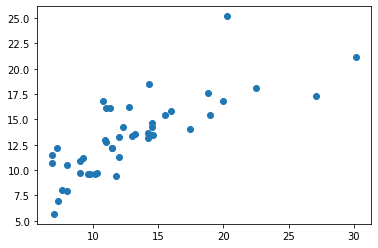

In [6]:
pred = model.predict(xtest)
r_sq = model.score(xtrain, ytrain)
print('coefficient of determination:', r_sq)
#vẽ biểu đồ giữa kết quả ban đầu vs kết quả dự đoán
plt.scatter( ytest,pred)
print(ytest)
plt.show()

In [24]:
import cufflinks as cf 
cf.go_offline()
import plotly.io as pio
pio.renderers.default = "colab"
pd.DataFrame({"Giá dự đoán":pred, "Giá ban đầu": ytest}).iplot(mode="markers")

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

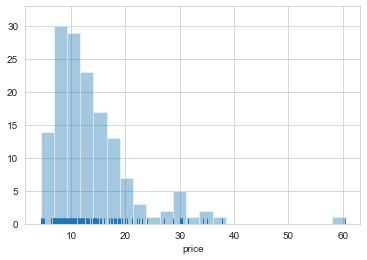

In [10]:
sns.set_style("whitegrid")
sns.distplot(Y, kde = False, rug = "True")

<AxesSubplot:>

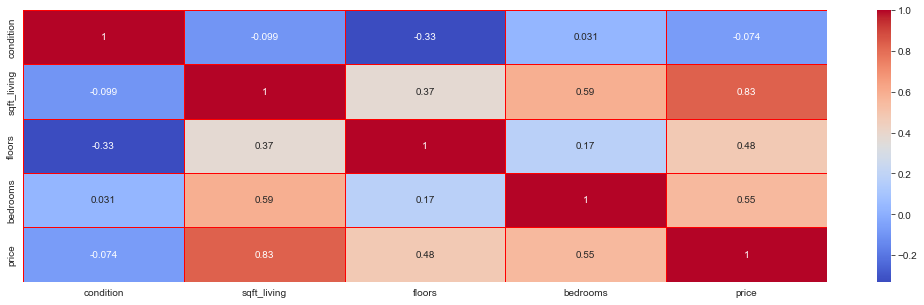

In [23]:
plt.figure(figsize=(18,5))
sns.heatmap(df.corr(), annot=True, lw = 1, linecolor="r",cmap="coolwarm")